In [1]:
rows, cols = 400, 200

In [2]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
count = 1
imagelist = []
f = open("photos.txt", "r")
for i in f.readlines():
    if i[-1] == '\n':
        img = Image.open(i[:-1])
    else:
        img = Image.open(i)

    newsize = (rows, cols)
    img = img.resize(newsize)
    img = img.convert(mode="1", dither=Image.NONE)
    imgarray = np.array(img)
    
    #this is only used when we need more data
    '''rotated_image = img.rotate(90)
    
    
    rtdarray = np.array(rotated_image)
    
    a = 1
    b = 0
    c = 5 #left/right (i.e. 5/-5)
    d = 0
    e = 1
    f = -5 #up/down (i.e. 5/-5)
    imgt = img.transform(img.size, Image.AFFINE, (a, b, c, d, e, f))

    imgtarray = np.array(imgt)
    
    imagelist.append(imgtarray)
    imagelist.append(rtdarray)'''
    imagelist.append(imgarray)
    print(count)
    count+=1

imagelist = np.array(imagelist)
print((imagelist.shape))

train = imagelist.reshape(imagelist.shape[0], -1).T 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [3]:
train.shape[1]

547

In [4]:
Y = np.zeros((1, train.shape[1])) + 1

In [5]:
Y.shape

(1, 547)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


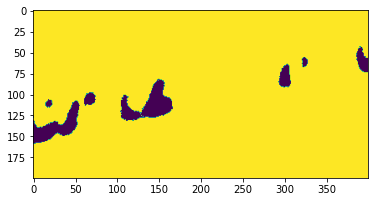

In [6]:
count = 1
imagelist = []
f = open("not_photos.txt", "r")
for i in f.readlines():
    if i[-1] == '\n':
        img = Image.open(i[:-1])
    else:
        img = Image.open(i)

    newsize = (rows,cols)
    img = img.resize(newsize)
    img = img.convert(mode="1", dither=Image.NONE)
    imgarray = np.array(img)
    
    #this is only used when we need more data
    '''rotated_image = img.rotate(90)
    
    rtdarray = np.array(rotated_image)
    
    a = 1
    b = 0
    c = 5 #left/right (i.e. 5/-5)
    d = 0
    e = 1
    f = -5 #up/down (i.e. 5/-5)
    imgt = img.transform(img.size, Image.AFFINE, (a, b, c, d, e, f))

    imgtarray = np.array(imgt)
    
    imagelist.append(imgtarray)    
    imagelist.append(rtdarray)'''
    imagelist.append(imgarray)
    print(count)
    count+=1

imagelist = np.array(imagelist)
print((imagelist.shape))
plt.imshow(imagelist[1])
train_not = imagelist.reshape(imagelist.shape[0], -1).T 

In [7]:
train_not.shape[1]

397

In [8]:
Y_not = np.zeros((1, train_not.shape[1]))

In [9]:
Y_not.shape

(1, 397)

In [10]:
X = np.concatenate((train, train_not), axis = 1)
Y = np.concatenate((Y, Y_not), axis = 1)

In [11]:
X.shape

(80000, 944)

In [12]:
Y.shape[1]

944

In [13]:
from sklearn.utils import shuffle
X_, Y_ = shuffle(X.T, Y.T)
X_, Y_ = X_.T, Y_.T
#shuffled so that all the 1 images are not together

In [14]:
X_train = X_[:, :(Y.shape[1]-100)]
X_test = X_[:, (Y.shape[1]-100):]
X_test.shape

(80000, 100)

In [15]:
Y_train = Y_[:, :(Y.shape[1]-100)]
Y_test = Y_[:, (Y.shape[1]-100):]
Y_test.shape

(1, 100)

In [16]:
#neural network starts now
#used andrew ng's deep learning model's help

In [17]:
initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [19]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [20]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [21]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [22]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = 'relu')
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = 'sigmoid')
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [23]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = -1/m * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL)))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [24]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T)/m
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [25]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [26]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, 'sigmoid')
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)],current_cache,"relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

In [27]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] -= learning_rate*grads['dW' + str(l+1)]
        parameters["b" + str(l+1)] -= learning_rate*grads['db' + str(l+1)]
    return parameters

In [28]:
#implementation of model starts here
### CONSTANTS ###
layers_dims = [rows * cols, 20, 7, 2, 1] #  4-layer model

In [29]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
        
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [ ]:
parameters = L_layer_model(X_train, Y_train, layers_dims, num_iterations = 1000, print_cost = True)
#cost doesn't decrease much

In [ ]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(220,120,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))


In [ ]:
predictions_train = predict(X_train, Y_train, parameters)

In [ ]:
predictions_test = predict(X_test, Y_test, parameters)

In [ ]:
my_image = "my.jpg" # change this to the name of your image file 
my_label_y = [0] # the true class of your image (1 -> cat, 0 -> non-cat)

image = Image.open(my_image)

newsize = (rows,cols)
img = image.resize(newsize)
img = img.convert(mode="1", dither=Image.NONE)
imgarray = np.array(img)

check = imgarray.reshape(1, -1).T 

my_predicted_image = predict(check, my_label_y, parameters)

plt.imshow(img)

#bad accuracy

In [30]:
#random forest now

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
from sklearn.ensemble import RandomForestClassifier

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    0.3s
[Parallel(n_jobs=40)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=40)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    0.6s
[Parallel(n_jobs=40)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=40)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    0

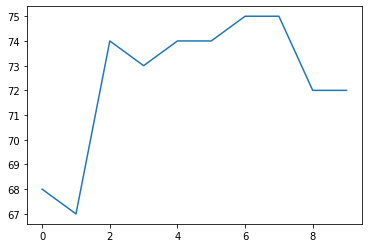

In [42]:
acc = []
for i in range(1, 11):
    rf = RandomForestClassifier(n_estimators = 200, max_depth = i, n_jobs = 40, verbose=1)
    rf.fit(X_train.T, Y_train.T.reshape(X_train.shape[1]))
    pred = rf.predict(X_test.T)
    acc.append((confusion_matrix(Y_test.T, pred)[0][0] + confusion_matrix(Y_test.T, pred)[1][1]))
plt.plot(acc)
#this loop was used to find the correct n_estimatores and max_depth. But it currently only shows for n_estimators,
#as max_depth was found

In [43]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 7, n_jobs = 70, verbose = 1)

In [44]:
rf.fit(X_train.T, Y_train.T.reshape(X_train.shape[1]))

[Parallel(n_jobs=70)]: Using backend ThreadingBackend with 70 concurrent workers.
[Parallel(n_jobs=70)]: Done  60 tasks      | elapsed:    1.0s
[Parallel(n_jobs=70)]: Done 200 out of 200 | elapsed:    2.3s finished


RandomForestClassifier(max_depth=7, n_estimators=200, n_jobs=70, verbose=1)

In [45]:
pred = rf.predict(X_test.T)
pred_on_train = rf.predict(X_train.T)

[Parallel(n_jobs=70)]: Using backend ThreadingBackend with 70 concurrent workers.
[Parallel(n_jobs=70)]: Done  60 tasks      | elapsed:    0.0s
[Parallel(n_jobs=70)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=70)]: Using backend ThreadingBackend with 70 concurrent workers.
[Parallel(n_jobs=70)]: Done  60 tasks      | elapsed:    0.0s
[Parallel(n_jobs=70)]: Done 200 out of 200 | elapsed:    0.0s finished


In [46]:
print(classification_report(Y_test.T, pred))
print(confusion_matrix(Y_test.T, pred))
#better accuracy than nueral network

              precision    recall  f1-score   support

         0.0       0.66      0.58      0.62        36
         1.0       0.78      0.83      0.80        64

    accuracy                           0.74       100
   macro avg       0.72      0.71      0.71       100
weighted avg       0.74      0.74      0.74       100

[[21 15]
 [11 53]]


In [47]:
print(classification_report(Y_train.T, pred_on_train))
print(confusion_matrix(Y_train.T, pred_on_train))
#at least it trains well!

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98       361
         1.0       0.97      1.00      0.98       483

    accuracy                           0.98       844
   macro avg       0.98      0.98      0.98       844
weighted avg       0.98      0.98      0.98       844

[[344  17]
 [  0 483]]


This is my handwriting
(400, 200)


[Parallel(n_jobs=70)]: Using backend ThreadingBackend with 70 concurrent workers.
[Parallel(n_jobs=70)]: Done  60 tasks      | elapsed:    0.0s
[Parallel(n_jobs=70)]: Done 200 out of 200 | elapsed:    0.0s finished


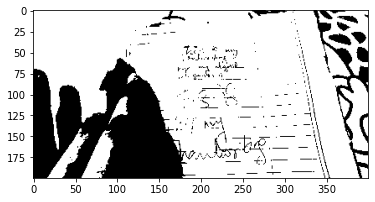

In [52]:
my_image = "not_my.jpg" # change this to the name of your image file 

image = Image.open(my_image)

newsize = (rows,cols)
img = image.resize(newsize)
img = img.convert(mode="1", dither=Image.NONE)
imgarray = np.array(img)
check = imgarray.reshape(1, -1).T 
ans = rf.predict(check.T)
print('This is my handwriting') if ans == 1 else print('This is not my handwriting')

print(img.size)
plt.imshow(img)

In [57]:
import _pickle as cPickle

with open('model.txt', 'wb') as f:

    cPickle.dump(rf, f)
#saving my model, because time is sparse ;)

In [60]:
#start from here if you dont want to train a random forest

In [61]:
# in your prediction file                                                                                                                           

with open('model.txt', 'rb') as f:

    rf = cPickle.load(f)

This is not my handwriting
(400, 200)


[Parallel(n_jobs=70)]: Using backend ThreadingBackend with 70 concurrent workers.
[Parallel(n_jobs=70)]: Done  60 tasks      | elapsed:    0.0s
[Parallel(n_jobs=70)]: Done 300 out of 300 | elapsed:    0.0s finished


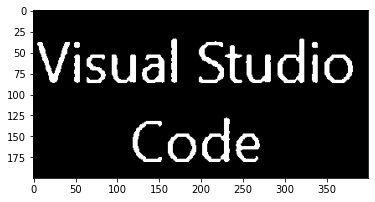

In [70]:
## START CODE HERE ##
my_image = "Capture.jpg" # change this to the name of your image file 

image = Image.open(my_image)

newsize = (rows,cols)
img = image.resize(newsize)
img = img.convert(mode="1", dither=Image.NONE)
imgarray = np.array(img)
check = imgarray.reshape(1, -1).T 
ans = rf.predict(check.T)
print('This is my handwriting') if ans == 1 else print('This is not my handwriting')

print(img.size)
plt.imshow(img)